# Logistic Regression

This statistical method is used for binary classification tasks (despite the name!), in addition to the perceptron. The main difference for logistic regression is that the data is not easily separable. As such, instead of predicting whether or not an input belongs to one category or the other, we predict the probability that the instance belongs to a particular category. 

Logistic regression uses the Sigmoid Function to map the inputs to a value between 0 and 1. This is how it looks like: 

$\sigma(z) = \frac{1}{1 + e^{-z}}$

z is the linear combination of the inputs and weights. So, $z= w_1x_1 + w_2x_2+....w_nx_n + b$. The sigmoid function predicts a probability, denoted $\hat{y}$. 

In order to train te model, we define a cost function. Commonly, we use the Binary Cross Entropy Function: 

$J(\theta) = -\frac{1}{N} \sum_{i=1}^{N} (y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i))$

In order to minimize this cost value, we use gradient descent again! This means updating each instance with a learning rate, $\alpha$:

$\theta_j = \theta_j - \alpha\frac{d}{d\theta_j}J(\theta)$





# Application

[heart attack dataset here](https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility)

In this notebook, we will be predicting if someone will get a heart attack based on two factors: age and maximum heart rate. You will notice that the correlation between these two factors is a bit weak, but we will continue for the sake of experiment.

This is how our Bernoulli function looks like:

\[$
    P(y= 1 | x) = \begin{cases}
    yhat & \text{if }  y =1 \\
    1-yhat  & \text{if } y = 0 
\end{cases}$
\]



Length of live.thalach: 499
Length of die.thalach: 526


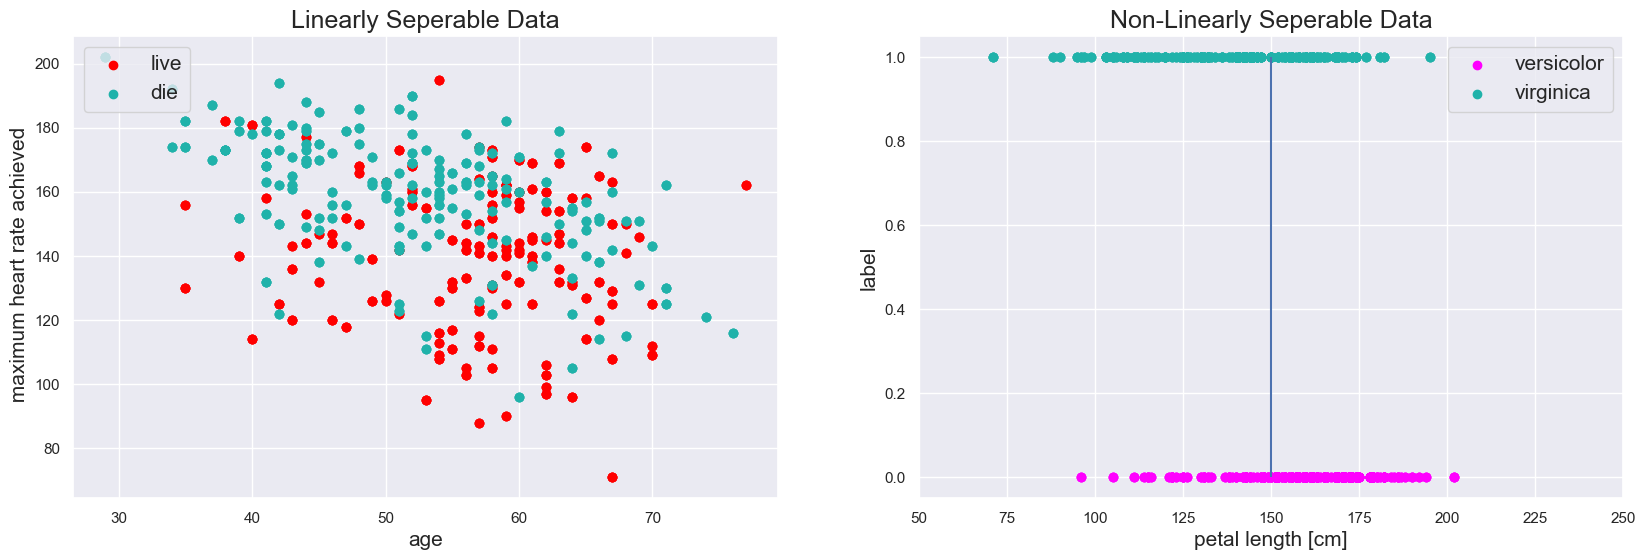

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import SingleNeuron as node


# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object with seaborn
df = pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\heart.csv")

live = df[df.target == 0]
die = df[df.target == 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.scatter(live.age, 
            live.thalach, 
            color = "red", 
            label = "live")
ax1.scatter(die.age, 
            die.thalach, 
            color = "lightseagreen", 
            label = "die")
ax1.set_xlabel("age", fontsize = 15)
ax1.set_ylabel(" maximum heart rate achieved", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)


ax2.set_xlim((50, 250))
ax2.scatter(die.thalach, 
            np.zeros(526), 
            color = "magenta", 
            label = "versicolor")
ax2.scatter(live.thalach, 
            np.ones(499), 
            color = "lightseagreen", 
            label = "virginica")
ax2.vlines(150, 0.0, 1)
ax2.set_xlabel("petal length [cm]", fontsize = 15)
ax2.set_ylabel("label", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper right")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)


print("Length of live.thalach:", len(live.thalach))
print("Length of die.thalach:", len(die.thalach))



This is BARELY linear. There is so much overlap that using the Perceptron would be pretty much impossible. However, we notice that a correlation does exist, though small, does exist, and we can use logistic regression to predict probabilities. live= 1, die= 0. 

Next, we define our main functions: the sigmoid function and the binary cross entropy loss function.

In [2]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

Then, we train the model.

In [3]:

X = df.iloc[1:2].thalach.values #maybe .iloc is the solution
X = X.reshape(-1, 1)
y = np.where(df.target == 1, 0, 1)

model = node.SingleNeuron(sigmoid, cross_entropy_loss)
model.train(X, y, alpha = 0.05, epochs = 4)

model.plot_cost_function
plt.show()


#IMPORT SINGLE NEURON!!!!

C:\Users\faith\AppData\Local\Temp\ipykernel_31352\2105989025.py:5: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
C:\Users\faith\AppData\Local\Temp\ipykernel_31352\2105989025.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


---

This looks good! Visualizing the cost function over the epochs during training helps us verify that are neuron is indeed learning over time. We can next visualize our hypthesis function, or prediction function (recall in all supervised machine learning we are learning a function $h$ which approximates the true target function $f$), by plotting the ```SingleNeuron.predict()``` method over the scattered data points in question. This can be done by running the following code in the cell below.


---

ValueError: x and y must be the same size

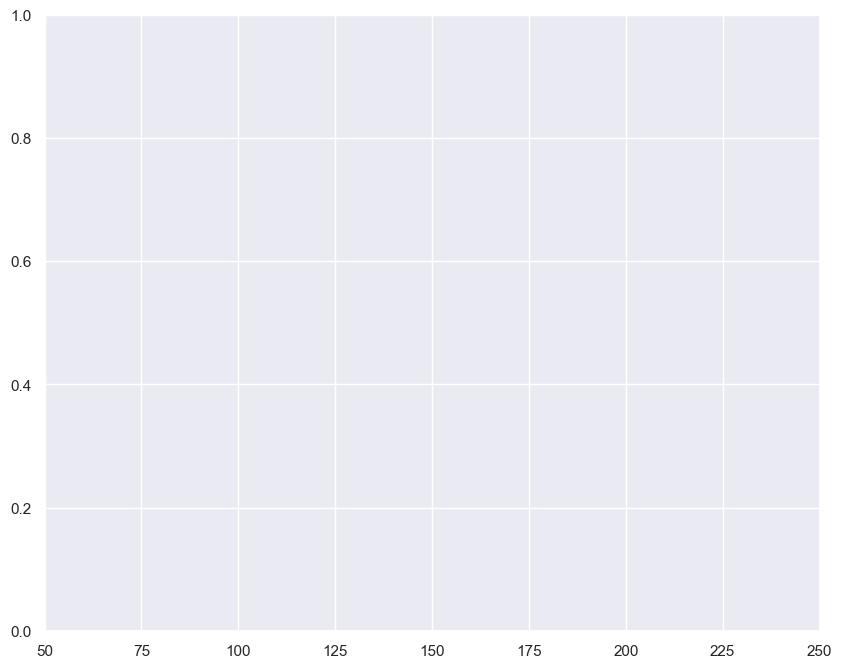

In [84]:
plt.figure(figsize = (10, 8))
plt.xlim((50,250 ))
plt.scatter(die.thalach, 
            np.zeros(499), 
            color = "magenta", 
            label = "live")
plt.scatter(live.thalach, 
            np.ones(526), 
            color = "lightseagreen", 
            label = "die")

domain = np.linspace(50, 250, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("petal length [cm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [ ]:
node.predict(X)

array([9.99951984e-39, 1.27207652e-19, 1.00000000e+00, ...,
       1.00000000e+00, 1.68342997e-25, 1.00000000e+00])

---

When using the trained weights and bias of our logistic single neuron to predict a class on a given measurement, we will need to convert the predicted probabilities to zeros and ones. This can be done by passing the ```numpy.ndarray``` returned by the ```SingleNeuron.predict()``` method into the ```numpy.rint()``` method. Moreover, we can use the resulting ```numpy.ndarray``` to compute the classification error over our training data given by the formula

$$
E_c = \frac{1}{N}\sum_{i=1}^{N}[\hat{y}^{(i)} \neq y^{(i)}],
$$

where $[\hat{y}^{(i)} \neq y^{(i)}] = 1$ whenever $\hat{y}^{(i)} \neq y^{(i)}$, and zero otherwise. Run the following code in the cell below to view this classification error. 


---

In [ ]:
np.rint(node.predict(X)) != y

array([ True,  True, False, ..., False, False, False])

In [ ]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.32


---

This is a great classification error on our training data! We can now view our decision boundary implied by the trained weights and bias by running the following code in the cell below.



---

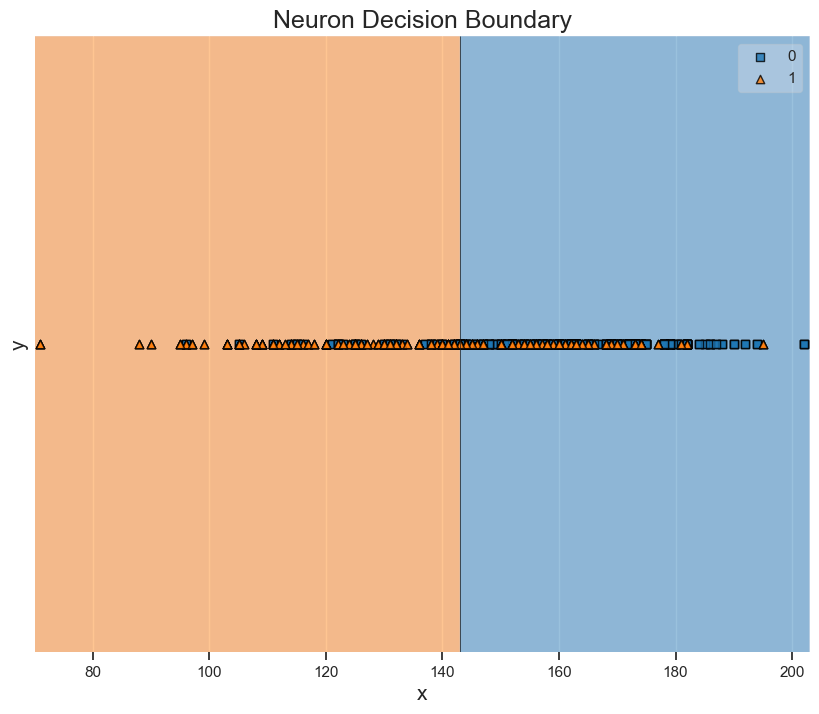

In [ ]:
node.plot_decision_boundary(X, y)
plt.show()

---

## Logistic Regression Single Neuron with Multiple Inputs
Thus far we have only used a single feature measurement as input into our logistic regression single neuron model, but what happens when we use *multiple measurements*. For example, we could use petal length and petal width. With two inputs our model can be depicted by the figure below.

The Logistic Single Neuron Model with Multiple Feature Inputs
---

<p align="center">
    <img src="multi_logistic_neuron.png" width="500">
</p>

---

Let us next instantiate a ```SingleNeuron``` model with petal length and sepal length measurements as input, train this model with the same learning rate and number of epochs as the variable ```node```, and then compare the cost function over epochs between the two models. This can be done by running the following code in the cell below. 


---

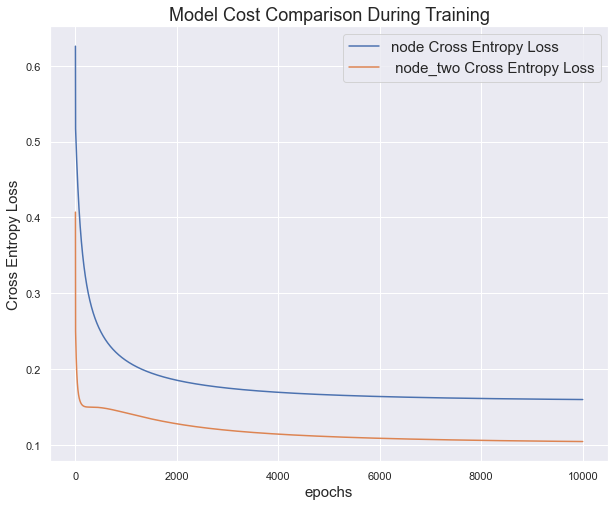

In [ ]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = df.iloc[50:][["petal_length", "sepal_length"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

---

As we can see by the figures generated above, using two features results in a lower cost function (in this particular instance) with the same learning rate and number of epochs. We encourage the reader to compare different combinations of features from the data and compare the loss function over time during training. Finally, let us visualize the decision boundary generated by the trained weights and bias of ```node_two``` by running the following code in the cell below. After running notice that even with the logistic regression single neuron, we are still learning a linearly seperating hyperplane.  


---

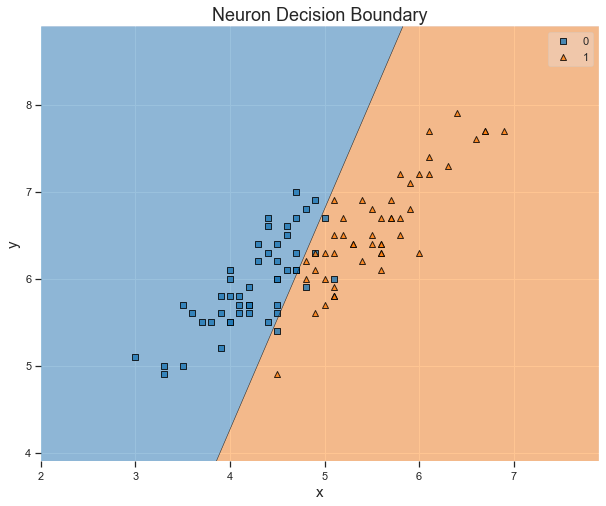

In [ ]:
node_two.plot_decision_boundary(X_two, y)

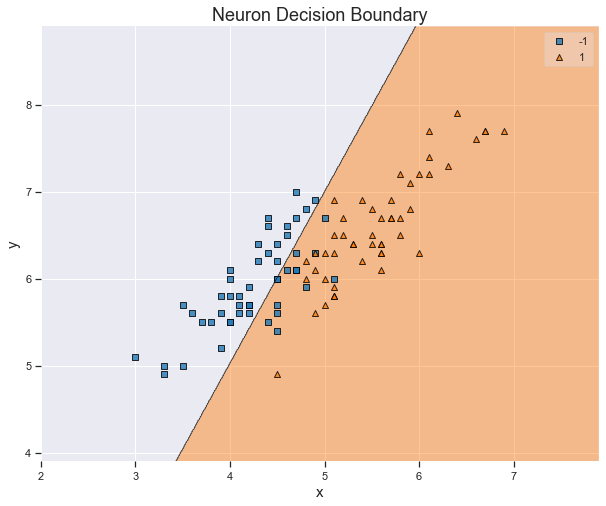

In [ ]:
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

# Instantiate a new single neuron.
node_three = SingleNeuron(sign, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_three = df.iloc[50:][["petal_length", "sepal_length"]].values

y_three = np.where(df.iloc[50:]["species"] == "versicolor", -1, 1)


# Train the new single neuron model on the new feature vectors.
node_three.train(X_three, y_three, alpha = 0.001, epochs = 5_000)

node_three.plot_decision_boundary(X_three, y_three)
plt.show()

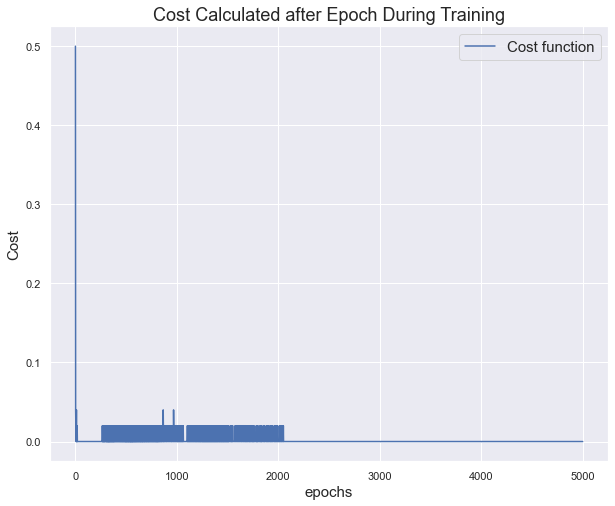

In [ ]:
node_three.plot_cost_function()

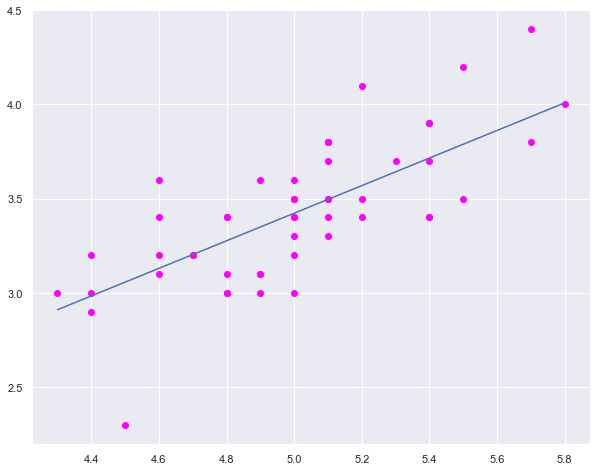

In [ ]:
def linear(z):
    return z

# Instantiate a new single neuron.
node_four = SingleNeuron(linear, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_four = df.iloc[0:50]["sepal_length"].values
X_four = X_four.reshape(-1, 1)

y_four = df.iloc[0:50]["sepal_width"].values


# Train the new single neuron model on the new feature vectors.
node_four.train(X_four, y_four, alpha = 0.001, epochs = 5_000)

plt.figure(figsize = (10, 8))
plt.scatter(X_four, y_four, label = "setosa", color = "magenta")

domain = np.linspace(np.min(X_four), np.max(X_four), 50)
plt.plot(domain, node_four.predict(domain.reshape(-1, 1)), label = "regression line")
plt.show()